<a href="https://colab.research.google.com/github/jpabonl/Proyecto-experimental/blob/main/Graficas_Toma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerias
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import os

Limpieza de archivos


In [ ]:
file_path = './Calibración/XrayHV80kV-1uA--CG50-FG10--Pos1-Ref-1Filtro--LiveTime300s--ConBloques.Spe'
data = np.loadtxt(file_path, skiprows=12)  # Se omite la primera fila que suele ser un encabezado


txt_file_path = '../Calibración/Datos/XrayHV80kV-1uA--CG50-FG10--Pos1-Ref-1Filtro--LiveTime300s--ConBloques.txt'
np.savetxt(txt_file_path, data, fmt='%f', delimiter='\t')


Graficas de las calibraciones

(pos 0) Mediana 1: 142.41236724487368, Mediana 2: 178.13792297444476
(pos 1) Mediana 1: 223.60485318398503, Mediana 2: 397.72203833255395
(pos 2) Mediana 1: 803.7841561035693, Mediana 2: 452.0045280507607
(pos 3) Mediana 1: 909.0648688762242, Mediana 2: 1615.349600178762
(pos 4) Mediana 1: 2293.874352577761, Mediana 2: 4069.5991230872733
(pos 5) Mediana 1: 4630.947056162324, Mediana 2: 8178.200837331769


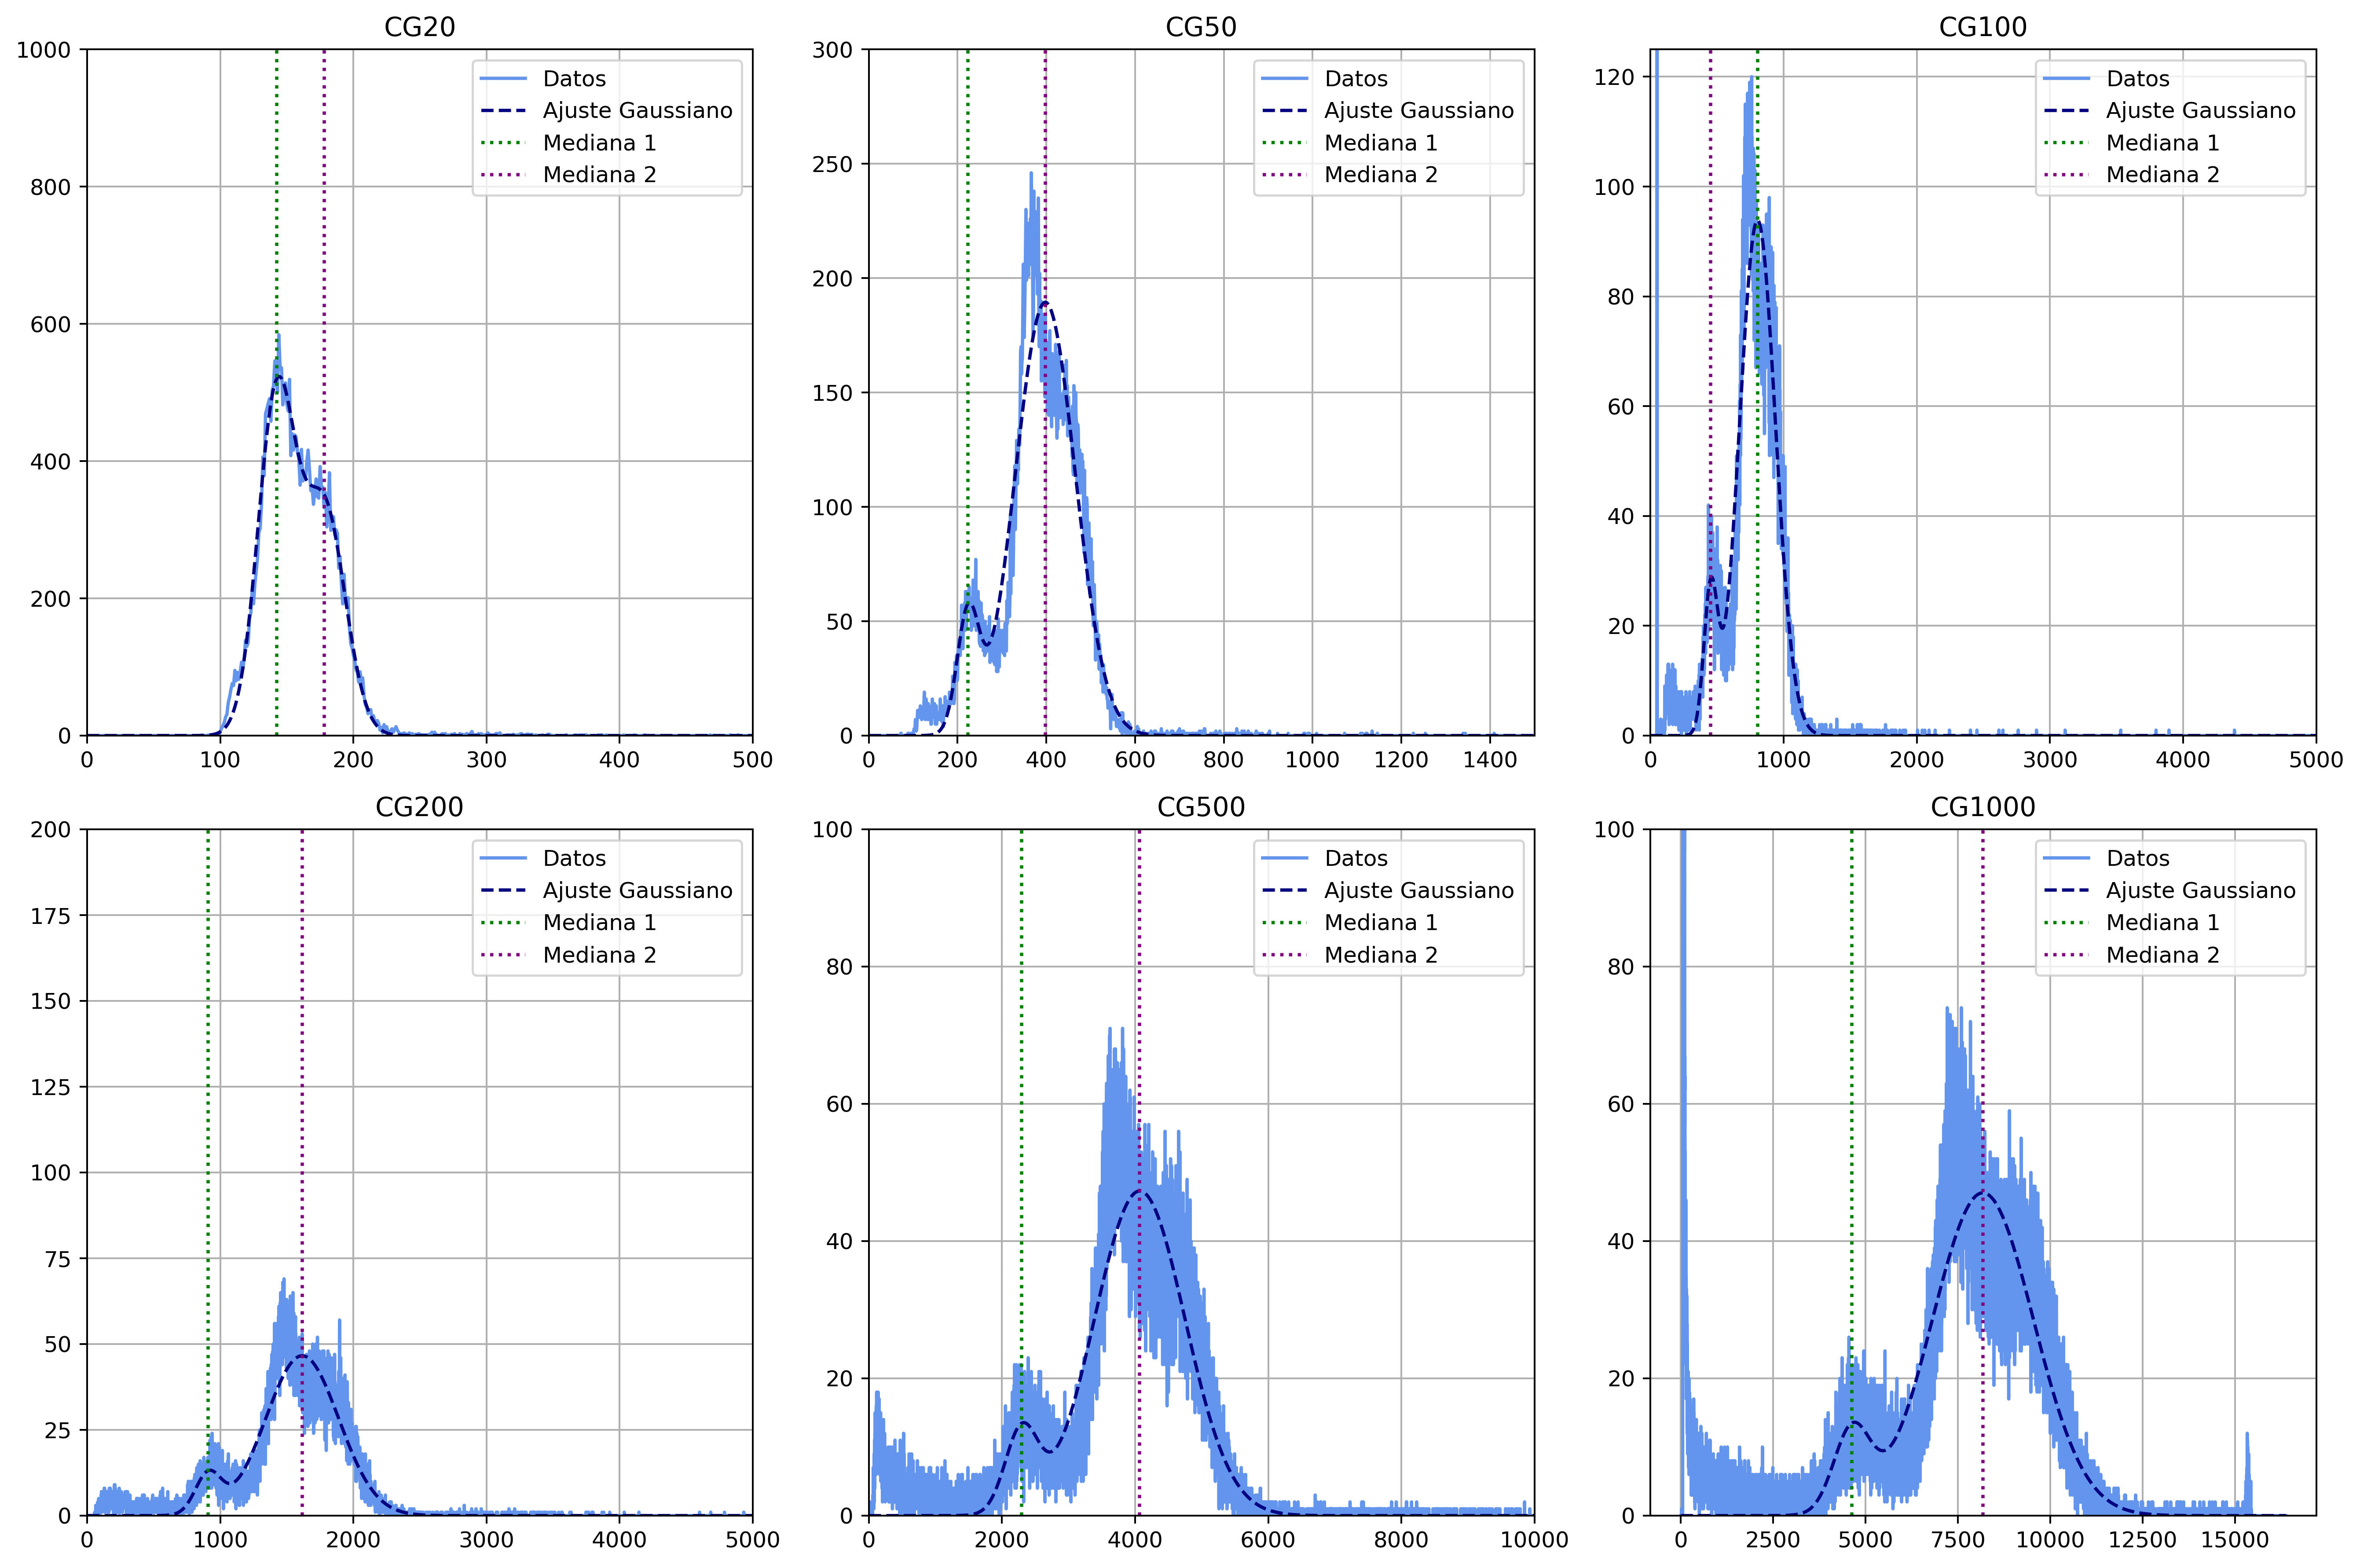

In [ ]:
'''CG20 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG20-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG50 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG50-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG100 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG100-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG200 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG200-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG500 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG500-bothOutputswOneUni-3Fe55onDetector-300sLiveTime.txt")
CG1000 = pd.read_csv("../Calibración/Datos/GEMHV4200-0pF-FG10-CG1000-bothOutputswOneUni-3Fe55onDetector-600sLiveTime.txt")


# Graficar subplots
plt.subplot(2, 3, 1)
plt.plot(CG20)
plt.ylim(0, 1000)
plt.xlim(0, 500)
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(CG50)
plt.ylim(0, 300)
plt.xlim(0, 1500)
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(CG100)
plt.ylim(0, 125)
plt.xlim(0, 5000)
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(CG200)
plt.ylim(0, 200)
plt.xlim(0, 5000)
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(CG500)
plt.ylim(0, 100)
plt.xlim(0, 10000)
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(CG1000)
plt.ylim(0, 100)
plt.grid()

plt.tight_layout()  # Ajustar automáticamente los subplots para evitar superposiciones
plt.show()
'''

#! Optimicé un poquito el código de las gráficas, se demora menos y es más práctico :p

#Esto hace que las gráficas tengan mejor calidad, que se vean como más nítidas, y que al guardarlas se vean mejor
plt.rcParams['figure.dpi'] = 360

configs = [
    {'cg': 'CG20', 'live_time': '120s', 'y_lim': (0, 1000), 'x_lim': (0, 500)},
    {'cg': 'CG50', 'live_time': '120s', 'y_lim': (0, 300), 'x_lim': (0, 1500)},
    {'cg': 'CG100', 'live_time': '120s', 'y_lim': (0, 125), 'x_lim': (0, 5000)},
    {'cg': 'CG200', 'live_time': '120s', 'y_lim': (0, 200), 'x_lim': (0, 5000)},
    {'cg': 'CG500', 'live_time': '300s', 'y_lim': (0, 100), 'x_lim': (0, 10000)},
    {'cg': 'CG1000', 'live_time': '600s', 'y_lim': (0, 100)}
]

data = {}
base_path = "../Calibración/Datos/GEMHV4200-0pF-FG10-{}-bothOutputswOneUni-3Fe55onDetector-{}LiveTime.txt"

# Cargar los datos desde los archivos
for config in configs:
    file_name = base_path.format(config['cg'], config['live_time'])
    data[config['cg']] = pd.read_csv(file_name)

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    return (gaussian(x, amp1, mean1, stddev1) + gaussian(x, amp2, mean2, stddev2))

def plot_with_gaussian_fit(ax, data, initial_guess):
    x_data = np.arange(len(data))
    y_data = data.values.flatten()

    # ajustar a la función double_gaussian
    popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

    # crear datos para la curva ajustada
    x_fit = np.linspace(x_data.min(), x_data.max(), len(data))
    y_fit = double_gaussian(x_fit, *popt)

    # graficar los datos originales y el ajuste
    ax.plot(x_data, y_data, label='Datos', c='cornflowerblue')
    ax.plot(x_fit, y_fit, label='Ajuste Gaussiano', linestyle='--', c='navy')

    # retornar los parámetros
    return popt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
initial_guesses = [
    [50, 100, 10, 150, 250, 20],
    [150, 200, 250, 300, 350, 40],
    [200, 250, 300, 350, 400, 40],
    [50, 100, 10, 150, 250, 20],
    [200, 2500, 100, 100, 4100, 300],
    [150, 4000, 100, 300, 9000, 200],
]

for i, (ax, config) in enumerate(zip(axes.flatten(), configs)):
    file_name = base_path.format(config['cg'], config['live_time'])
    data = pd.read_csv(file_name)

    popt = plot_with_gaussian_fit(ax, data, initial_guesses[i])

    # mostrar la mediana de los ajustes (el valor del eje x de la línea)
    median1 = popt[1]
    median2 = popt[4]
    print(f'(pos {i}) Mediana 1: {median1}, Mediana 2: {median2}')
    ax.axvline(median1, color='green', linestyle=':', label='Mediana 1')
    ax.axvline(median2, color='purple', linestyle=':', label='Mediana 2')

    # configurar los límites y títulos
    ax.set_ylim(config['y_lim'])
    if 'x_lim' in config:
        ax.set_xlim(config['x_lim'])
    ax.set_title(config['cg'])
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
CG20 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG20-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG50 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG50-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG100 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG100-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG200 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG200-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG500 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG500-bothOutputswOneUni-3Fe55onDetector-300sLiveTime.txt")
CG1000 = pd.read_csv("Calibración/Datos/GEMHV4200-0pF-FG10-CG1000-bothOutputswOneUni-3Fe55onDetector-600sLiveTime.txt")

Grafica Referencia

In [2]:
Pos8Ref = pd.read_csv("Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.txt")

11850.0


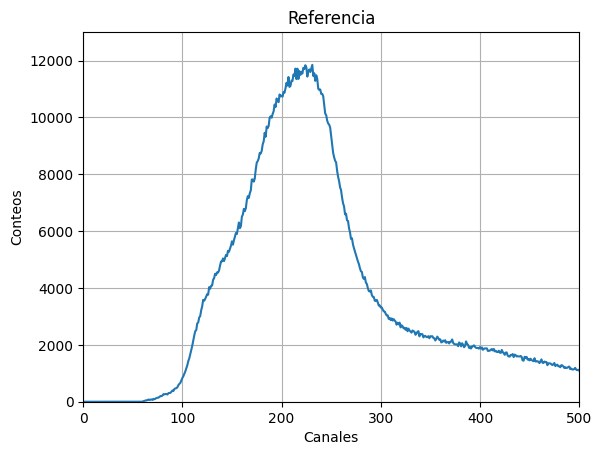

In [3]:
plt.plot(Pos8Ref)
plt.xlim(0, 500)
plt.ylim(0, 13000)
plt.grid()
plt.title("Referencia")
plt.ylabel("Conteos")
plt.xlabel("Canales")
print(np.max(Pos8Ref))

Graficas muestras MoS2

In [4]:
Pos1MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos1-MoS2-400nm--LiveTime300s--ConBloques.txt")
Pos4MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos4-MoS2-350nm--LiveTime300s--ConBloques.txt")
Pos5MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos5-MoS2-300nm--LiveTime300s--ConBloques.txt")
Pos6MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos6-MoS2-500nm--LiveTime300s--ConBloques.txt")
Pos7MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos7-MoS2-450nm--LiveTime300s--ConBloques.txt")

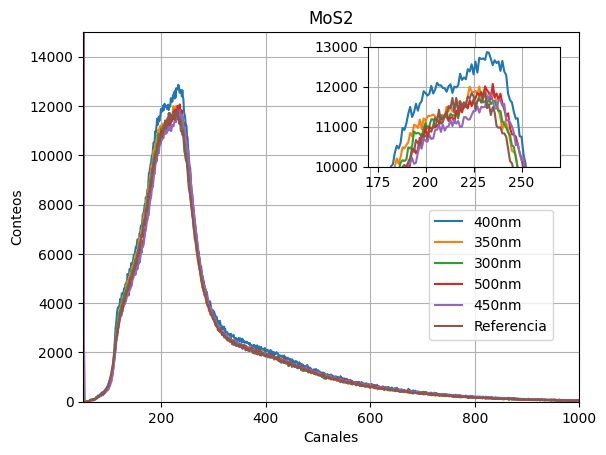

In [5]:
plt.plot(Pos1MoS2, label="400nm")
plt.plot(Pos4MoS2, label="350nm")
plt.plot(Pos5MoS2, label="300nm")
plt.plot(Pos6MoS2, label="500nm")
plt.plot(Pos7MoS2, label="450nm")
plt.plot(Pos8Ref, label="Referencia")
plt.ylim(0, 15000)
plt.xlim(50, 1000)
plt.grid()
plt.xlabel("Canales")
plt.ylabel("Conteos")
plt.title("MoS2")
# Definir los límites para el zoom-in
xmin = 170
xmax = 270
ymin = 10000
ymax = 13000

# Crear un área para el zoom-in en la esquina derecha
zoom_ax = plt.axes([0.57, 0.6, 0.3, 0.25])  # [left, bottom, width, height]
zoom_ax.plot(Pos1MoS2, label="400nm")
zoom_ax.plot(Pos4MoS2, label="350nm")
zoom_ax.plot(Pos5MoS2, label="300nm")
zoom_ax.plot(Pos6MoS2, label="500nm")
zoom_ax.plot(Pos7MoS2, label="450nm")
zoom_ax.plot(Pos8Ref, label="Referencia")
zoom_ax.set_ylim(ymin, ymax)
zoom_ax.set_xlim(xmin, xmax)

zoom_ax.grid()

# Mostrar la leyenda en la gráfica principal
plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
# Mostrar la gráfica completa con el zoom-in
plt.show()


Graficas muestras WS2


In [6]:
Pos2WS2 = pd.read_csv("Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos2-WS2-350nm--LiveTime300s--ConBloques.txt")
Pos3WS2 = pd.read_csv("Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos3-WS2-300nm--LiveTime300s--ConBloques.txt")

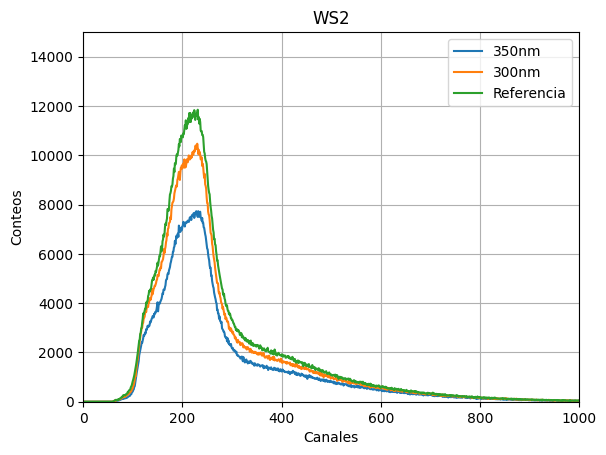

In [7]:
plt.plot(Pos2WS2, label="350nm")
plt.plot(Pos3WS2, label="300nm")
plt.plot(Pos8Ref, label="Referencia")
plt.xlim(0,1000)
plt.ylim(0, 15000)
plt.grid()
plt.title("WS2")
plt.ylabel("Conteos")
plt.xlabel("Canales")
plt.legend()
plt.show()

Normalización de la grafica de WS2


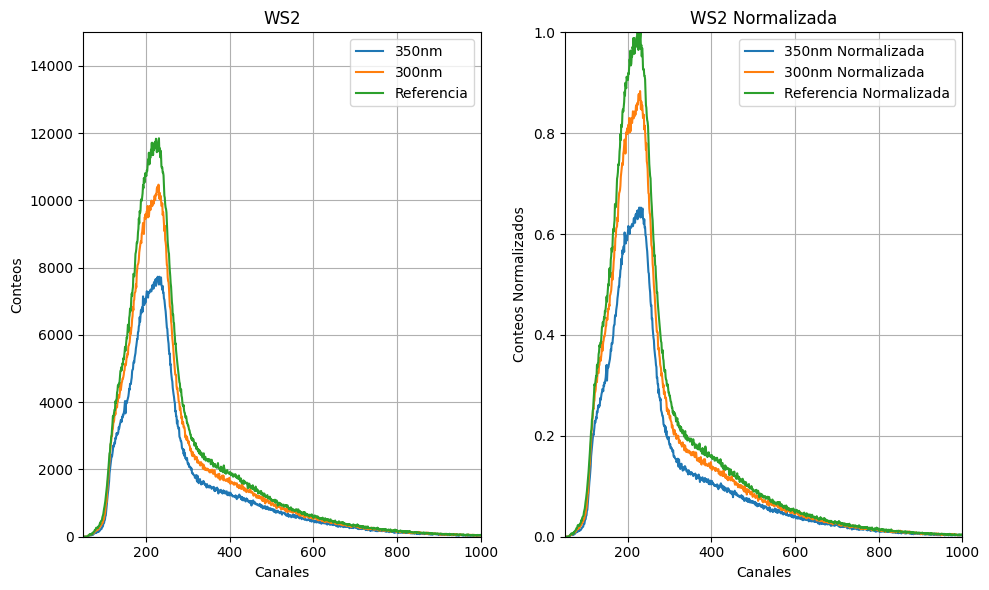

Diferencia relativa media de Pos2WS2_normalized respecto a Pos8Ref_normalized: 0.33113000998513686
Diferencia relativa media de Pos3WS2_normalized respecto a Pos8Ref_normalized: 0.12252589709771705


In [8]:
# Calcular los máximos y mínimos de Pos8Ref
max_Pos8Ref = np.max(Pos8Ref)
min_Pos8Ref = np.min(Pos8Ref)

# Normalizar los datos de Pos2WS2 y Pos3WS2 utilizando los máximos y mínimos de Pos8Ref
Pos2WS2_normalized = (Pos2WS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos3WS2_normalized = (Pos3WS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos8Ref_normalized = (Pos8Ref - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)

# Graficar la función original y la función normalizada
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(Pos2WS2, label='350nm')
plt.plot(Pos3WS2, label='300nm')
plt.plot(Pos8Ref, label='Referencia')
plt.xlim(50, 1000)
plt.ylim(0, 15000)
plt.grid()
plt.title('WS2')
plt.ylabel('Conteos')
plt.xlabel('Canales')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Pos2WS2_normalized, label='350nm Normalizada')
plt.plot(Pos3WS2_normalized, label='300nm Normalizada')
plt.plot(Pos8Ref_normalized, label='Referencia Normalizada')
plt.xlim(50, 1000)
plt.ylim(0, 1)
plt.grid()
plt.title('WS2 Normalizada')
plt.ylabel('Conteos Normalizados')
plt.xlabel('Canales')
plt.legend()

plt.tight_layout()
plt.show()

diff_Pos2WS2 = np.abs(Pos2WS2_normalized - Pos8Ref_normalized)

# Calcular la diferencia relativa entre Pos3WS2_normalized y Pos8Ref_normalized
diff_Pos3WS2 = np.abs(Pos3WS2_normalized - Pos8Ref_normalized)

# Calcular el promedio de las diferencias relativas
mean_diff_Pos2WS2 = np.mean(diff_Pos2WS2)*100
mean_diff_Pos3WS2 = np.mean(diff_Pos3WS2)*100

print("Diferencia relativa media de Pos2WS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos2WS2)
print("Diferencia relativa media de Pos3WS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos3WS2)

Normalización de la grafica MoS2


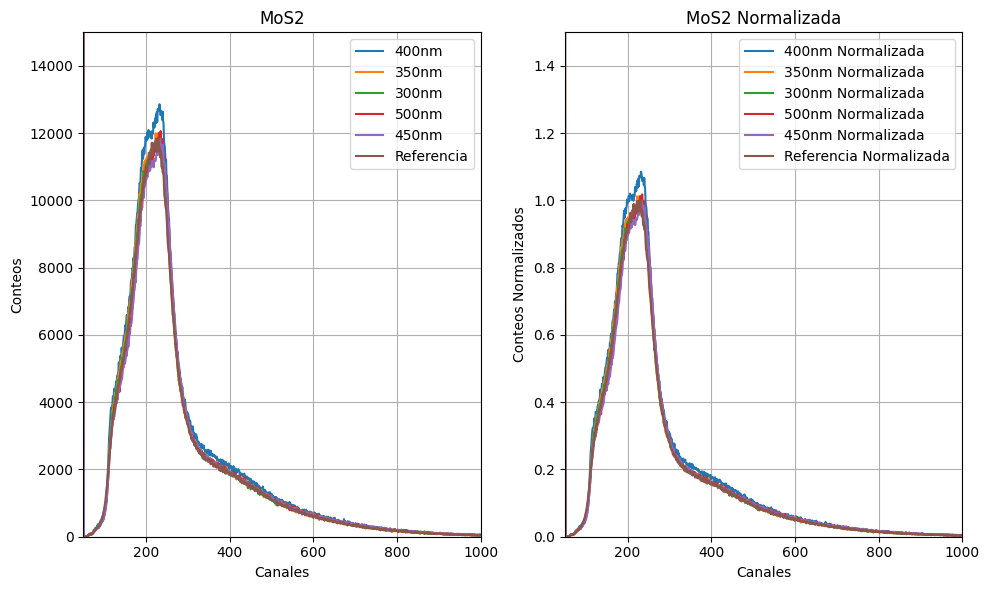

Diferencia relativa media de Pos1MoS2_normalized respecto a Pos8Ref_normalized: 0.001973059961558382
Diferencia relativa media de Pos4MoS2_normalized respecto a Pos8Ref_normalized: 0.0013023430946610035
Diferencia relativa media de Pos5MoS2_normalized respecto a Pos8Ref_normalized: 0.0012113977363073947
Diferencia relativa media de Pos6MoS2_normalized respecto a Pos8Ref_normalized: 0.0013250845852098925
Diferencia relativa media de Pos7MoS2_normalized respecto a Pos8Ref_normalized: 0.0013922273551543471


In [9]:
# Calcular los máximos y mínimos de Pos8Ref
max_Pos8Ref = np.max(Pos8Ref)
min_Pos8Ref = np.min(Pos8Ref)

# Normalizar los datos de Pos2WS2 y Pos3WS2 utilizando los máximos y mínimos de Pos8Ref
Pos1MoS2_normalized = (Pos1MoS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos4MoS2_normalized = (Pos4MoS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos5MoS2_normalized = (Pos5MoS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos6MoS2_normalized = (Pos6MoS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos7MoS2_normalized = (Pos7MoS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos8Ref_normalized = (Pos8Ref - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)

# Graficar la función original y la función normalizada
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(Pos1MoS2, label="400nm")
plt.plot(Pos4MoS2, label="350nm")
plt.plot(Pos5MoS2, label="300nm")
plt.plot(Pos6MoS2, label="500nm")
plt.plot(Pos7MoS2, label="450nm")
plt.plot(Pos8Ref, label='Referencia')
plt.xlim(50, 1000)
plt.ylim(0, 15000)
plt.grid()
plt.title('MoS2')
plt.ylabel('Conteos')
plt.xlabel('Canales')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Pos1MoS2_normalized, label='400nm Normalizada')
plt.plot(Pos4MoS2_normalized, label='350nm Normalizada')
plt.plot(Pos5MoS2_normalized, label='300nm Normalizada')
plt.plot(Pos6MoS2_normalized, label='500nm Normalizada')
plt.plot(Pos7MoS2_normalized, label='450nm Normalizada')
plt.plot(Pos8Ref_normalized, label='Referencia Normalizada')
plt.xlim(50, 1000)
plt.ylim(0, 1.5)
plt.grid()
plt.title('MoS2 Normalizada')
plt.ylabel('Conteos Normalizados')
plt.xlabel('Canales')
plt.legend()

plt.tight_layout()
plt.show()

diff_Pos1MoS2 = np.abs(Pos1MoS2_normalized - Pos8Ref_normalized)
diff_Pos4MoS2 = np.abs(Pos4MoS2_normalized - Pos8Ref_normalized)
diff_Pos5MoS2 = np.abs(Pos5MoS2_normalized - Pos8Ref_normalized)
diff_Pos6MoS2 = np.abs(Pos6MoS2_normalized - Pos8Ref_normalized)
diff_Pos7MoS2 = np.abs(Pos7MoS2_normalized - Pos8Ref_normalized)

# Calcular el promedio de las diferencias relativas
mean_diff_Pos1MoS2 = np.mean(diff_Pos1MoS2)
mean_diff_Pos4MoS2 = np.mean(diff_Pos4MoS2)
mean_diff_Pos5MoS2 = np.mean(diff_Pos5MoS2)
mean_diff_Pos6MoS2 = np.mean(diff_Pos6MoS2)
mean_diff_Pos7MoS2 = np.mean(diff_Pos7MoS2)


print("Diferencia relativa media de Pos1MoS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos1MoS2)
print("Diferencia relativa media de Pos4MoS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos4MoS2)
print("Diferencia relativa media de Pos5MoS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos5MoS2)
print("Diferencia relativa media de Pos6MoS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos6MoS2)
print("Diferencia relativa media de Pos7MoS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos7MoS2)


In [ ]:
# Guardar Pos2WS2_normalized en un archivo de texto
np.savetxt('Pos2WS2_normalized.txt', Pos2WS2_normalized)

# Guardar Pos3WS2_normalized en un archivo de texto
np.savetxt('Pos3WS2_normalized.txt', Pos3WS2_normalized)

# Guardar Pos8Ref_normalized en un archivo de texto
np.savetxt('Pos8Ref_normalized.txt', Pos8Ref_normalized)


In [21]:
import pandas as pd

# Lee el archivo de texto
data = pd.read_csv('Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos7-MoS2-450nm--LiveTime300s--ConBloques.txt', sep='\t')  # Puedes cambiar el separador según sea necesario

# Guarda los datos en un archivo de Excel
data.to_excel('MoS2_450.xlsx', index=False)  # index=False evita que se incluya el índice en el archivo Excel



# **Grafica con barras de error**

---



Datos sin normalizar WS2


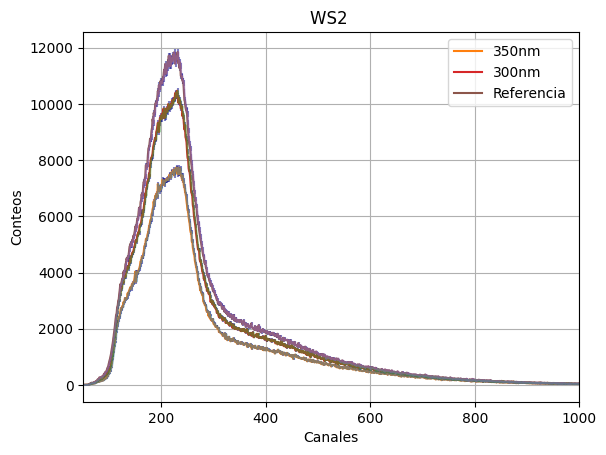

In [10]:
# Definir los datos y las barras de error para el primer gráfico
archivo_txt = 'Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos2-WS2-350nm--LiveTime300s--ConBloques.txt'
datos = np.loadtxt(archivo_txt)
barras_error = np.sqrt(datos)

# Crear el gráfico de 350 nm
plt.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
plt.plot(Pos2WS2, label="350nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 ')
plt.grid(True)

# Agregar el segundo gráfico
archivo_txt2 = 'Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos3-WS2-300nm--LiveTime300s--ConBloques.txt'
datos2 = np.loadtxt(archivo_txt2)
barras_error2 = np.sqrt(datos2)

plt.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
plt.plot(Pos3WS2, label="300nm")

# Agregar el tercer gráfico
archivo_txt3 = 'Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.txt'
datos3 = np.loadtxt(archivo_txt3)
barras_error3 = np.sqrt(datos3)

plt.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
plt.plot(Pos8Ref, label="Referencia")

plt.legend()
plt.show()


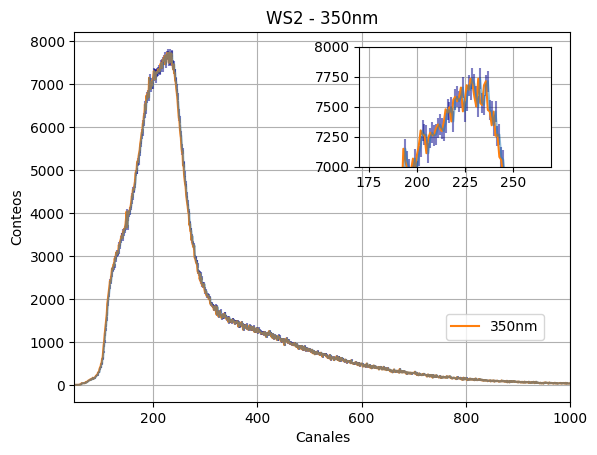

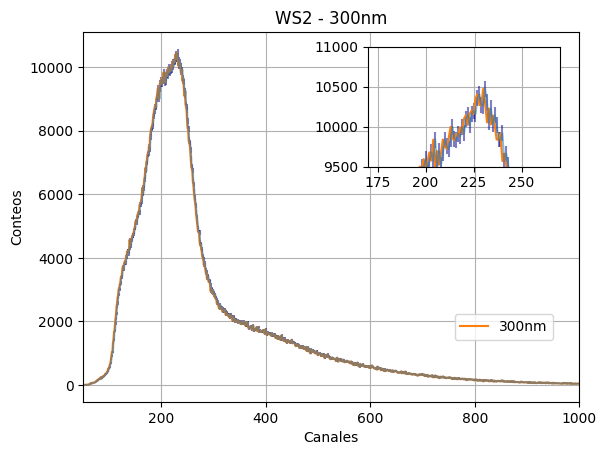

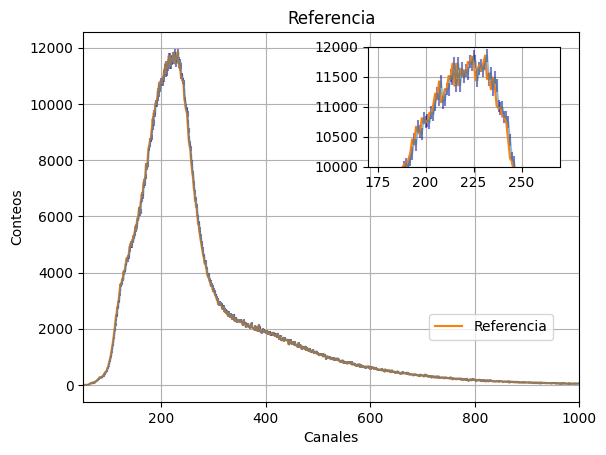

In [15]:
# Crear el gráfico principal con barras de error
plt.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
plt.plot(Pos2WS2, label="350nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 - 350nm')
plt.grid(True)

# Crear el área de zoom-in para el primer gráfico
zoom_ax1 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax1.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
zoom_ax1.plot(Pos2WS2 , label="350nm")
zoom_ax1.set_ylim(7000, 8000)
zoom_ax1.set_xlim(170, 270)
zoom_ax1.grid()

# Mostrar la leyenda en el primergráfico
plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')

plt.show()

# Repetir el proceso para el segundo gráfico
plt.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
plt.plot(Pos3WS2, label="300nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 - 300nm')
plt.grid(True)

zoom_ax2 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax2.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
zoom_ax2.plot(Pos3WS2, label="300nm")
zoom_ax2.set_ylim(9500, 11000)
zoom_ax2.set_xlim(170, 270)
zoom_ax2.grid()

plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
plt.show()

# Agregar el tercer gráfico y su zoom-in
plt.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
plt.plot(Pos8Ref, label="Referencia")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('Referencia')
plt.grid(True)

zoom_ax3 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax3.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
zoom_ax3.plot(Pos8Ref, label="Referencia")
zoom_ax3.set_ylim(10000, 12000)
zoom_ax3.set_xlim(170, 270)
zoom_ax3.grid()

plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
plt.show()


Ejemplo graficas UV-Vis

In [ ]:
# Leer el archivo Excel
archivo_excel = 'UVvisMoS2.xlsx'
hoja_excel = 'Hoja1'
df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

x = df['[nm]'].values
y = df['[A]'].values
plt.plot(x, y, 'r')
plt.plot(635,0.1973,"o")
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Absorbancia (A)')
plt.title('Espectro de absorción de MoS2')
plt.grid(True)
plt.show()



In [ ]:
# Leer el archivo Excel
archivo_excel = 'UVvisWS2.xlsx'
hoja_excel = 'Hoja1'
df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

x = df['[nm]'].values
y = df['[A]'].values
plt.plot(x, y, 'r')
plt.plot(635,0.4694,"o")
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Absorbancia (A)')
plt.title('Espectro de absorción de WS2')
plt.grid(True)
plt.show()


Graficas en KeV

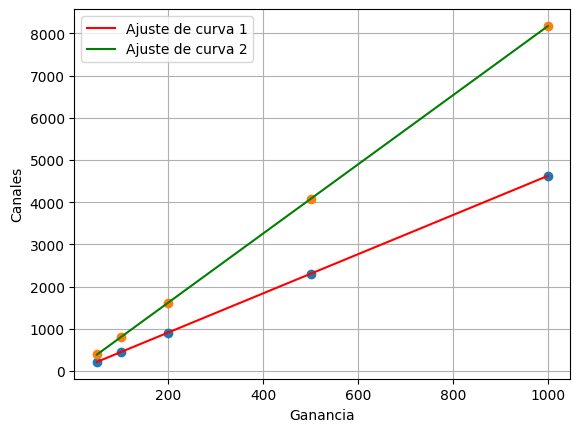

Parámetros ajustados para la línea 1: a = 4.639967637548391, b = -14.788025890001771
Parámetros ajustados para la línea 2: a = 8.191343042338033, b = -17.796925756290772


In [12]:
# Leer el archivo Excel
archivo_excel = 'Calibracion.xlsx'
hoja_excel = 'Hoja1'

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

# Supongamos que tienes tres columnas 'x', 'y', 'error_x', y 'error_y' en tu hoja de Excel
x = df['Ganancia1'].values
y = df['Canales1'].values


def modelo_lineal(x, a, b):
    return a * x + b

params1, covariance1 = curve_fit(modelo_lineal, x, y)

a1, b1 = params1

x2 = df['Ganancia2'].values
y2 = df['Canales2'].values
params2, covariance2 = curve_fit(modelo_lineal, x2, y2)
a2, b2 = params2

# Crear una línea de regresión para ambas líneas
y_regresion1 = modelo_lineal(x, a1, b1)
y_regresion2 = modelo_lineal(x2, a2, b2)
plt.plot(x, y, 'o')
plt.plot(x2, y2, 'o')
plt.plot(x, y_regresion1, 'r', label='Ajuste de curva 1')
plt.plot(x2, y_regresion2, 'g', label='Ajuste de curva 2')
plt.xlabel('Ganancia')
plt.ylabel('Canales')
plt.legend()
plt.grid()

plt.show()

# Imprimir los parámetros ajustados para ambas líneas
print(f"Parámetros ajustados para la línea 1: a = {a1}, b = {b1}")
print(f"Parámetros ajustados para la línea 2: a = {a2}, b = {b2}")


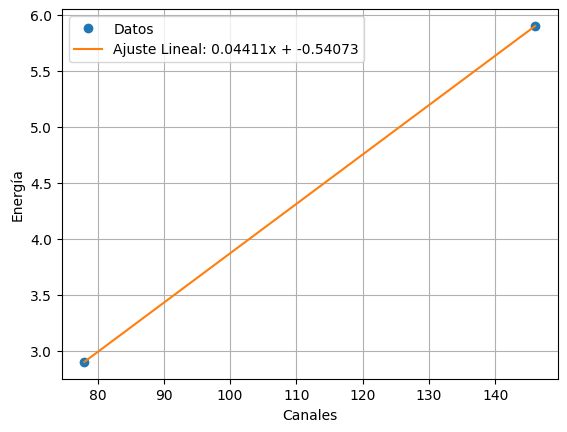

In [ ]:
x = np.array([78.01132860966049, 146.02993509046988])
y = np.array([2.9, 5.9])

# Ajuste lineal
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)

# Gráfica de puntos y ajuste
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, poly(x), label=f'Ajuste Lineal: {coefficients[0]:.5f}x + {coefficients[1]:.5f}')
plt.xlabel('Canales')
plt.ylabel('Energía')
plt.grid()
plt.legend()
plt.show()


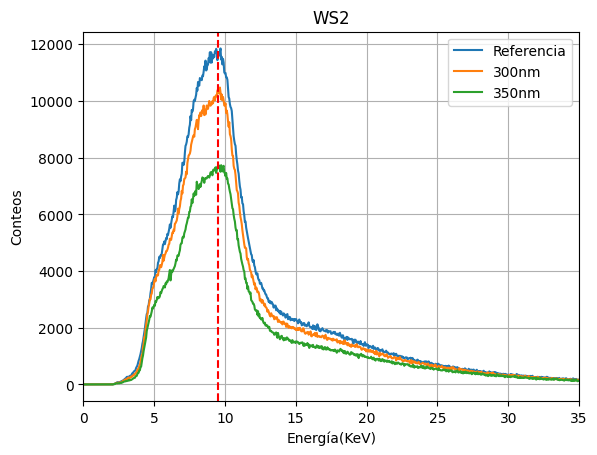

In [26]:

# Leer el archivo Excel
archivo_excel = 'Datos_referencia.xlsx'
hoja_excel = 'Hoja1'

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

x = df['Energia'].values
y = df['Conteos'].values
y1 = df['WS2_300'].values
y2 = df['WS2_350'].values

plt.plot(x, y, label='Referencia')
plt.plot(x, y1, label='300nm')
plt.plot(x, y2, label='350nm')

plt.xlabel('Energía(KeV)')
plt.ylabel('Conteos')
plt.title('WS2')
plt.xlim(0,35)
plt.grid()
plt.legend()
plt.axvline(x=9.5, color='r', linestyle='--')
plt.show()


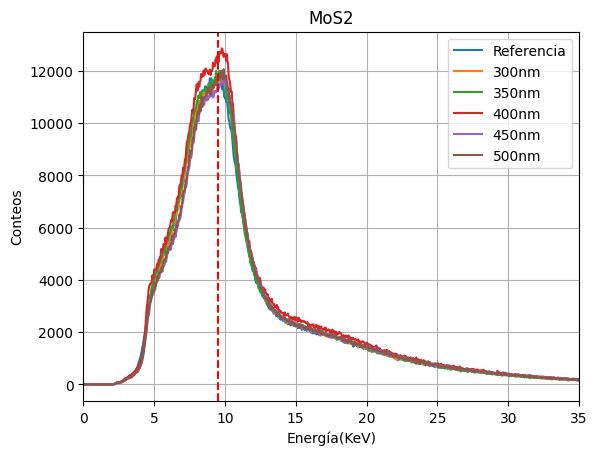

In [24]:

# Leer el archivo Excel
archivo_excel = 'Datos_referencia.xlsx'
hoja_excel = 'Hoja1'

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

x = df['Energia'].values
y = df['Conteos'].values
y1 = df['MoS2_300'].values
y2 = df['MoS2_350'].values
y3 = df['MoS2_400'].values
y4 = df['MoS2_450'].values
y5 = df['MoS2_500'].values

plt.plot(x, y, label='Referencia')
plt.plot(x, y1, label='300nm')
plt.plot(x, y2, label='350nm')
plt.plot(x, y3, label='400nm')
plt.plot(x, y4, label='450nm')
plt.plot(x, y5, label='500nm')


plt.xlabel('Energía(KeV)')
plt.ylabel('Conteos')
plt.title('MoS2')
plt.xlim(0,35)
plt.grid()
plt.legend()
plt.axvline(x=9.5, color='r', linestyle='--')
plt.show()


# **Absorbancia bulk**

---



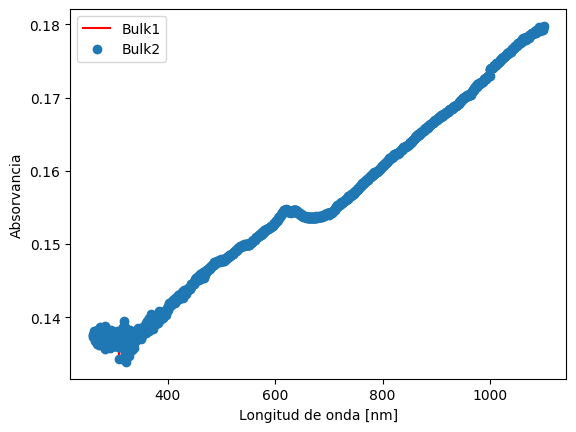

In [ ]:
archivo_excel = 'Bulk1.xlsx'  # Reemplaza 'tu_archivo.xlsx' con la ubicación de tu archivo
hoja_excel2 = 'Sheet1'  # Reemplaza 'Hoja1' con el nombre de la hoja que deseas procesar
archivo_excel2 = 'Bulk2.xlsx'
hoja_excel2 = 'Sheet1'
df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)
df2 = pd.read_excel(archivo_excel2, sheet_name=hoja_excel)
# Supongamos que tienes tres columnas 'x', 'y', 'error_x', y 'error_y' en tu hoja de Excel
x = df['[nm]'].values
y = df['[A]'].values
y2 =df['[A]'].values
plt.plot(x, y, 'r', label='Bulk1')
#plt.plot(x, y2, 'o', label='Bulk2')
plt.xlabel('Longitud de onda [nm]')
plt.ylabel('Absorvancia')
plt.legend()
plt.show()
